### Importing libraries ###

In [52]:
import pandas as pd

In [53]:
import numpy as np
import hashlib
from datetime import datetime, date
from sklearn.cluster import KMeans
import matplotlib.pyplot as mtp

### Data Loading ###

In [54]:
transaction_df = pd.read_csv('bank_transactions.csv')
transaction_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
16475,T16476,C1439559,30/3/84,M,ASANSOL,31676.11,26/9/16,204024,180.0
16476,T16477,C1624960,19/8/90,F,VISAKHAPATNAM,18001.73,26/9/16,205310,120.0
16477,T16478,C1331526,10/8/90,M,OFF HAL AIRPORT BANGALORE,13517.67,26/9/16,203726,200.0
16478,T16479,C4141991,10/1/79,M,NAVI MUMBAI,63659.35,26/9/16,203827,880.0


In [55]:
transaction_df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

### Data Cleaning ###

In [56]:
transaction_df.isnull()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
16475,False,False,False,False,False,False,False,False,False
16476,False,False,False,False,False,False,False,False,False
16477,False,False,False,False,False,False,False,False,False
16478,False,False,False,False,False,False,False,False,False


In [57]:
transaction_df.isna().sum()

TransactionID               0
CustomerID                  0
CustomerDOB                54
CustGender                  7
CustLocation                1
CustAccountBalance         24
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

In [58]:
transaction_df[['CustomerDOB','CustGender','CustLocation']] = transaction_df[['CustomerDOB','CustGender','CustLocation']].fillna(method='ffill')

In [59]:
transaction_df[['CustAccountBalance']] = transaction_df[['CustAccountBalance']].fillna(value=0)

In [60]:
transaction_df[['CustomerID']] = transaction_df[['CustomerID']].astype(str)
transaction_df['CustomerID'] = transaction_df['CustomerID'].apply(
    lambda x:
        hashlib.sha256(x.encode()).hexdigest()
)

In [61]:
transaction_df.replace("NaN", np.nan)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,0917d4201b7ffddc0639d71bbdb0c32bce71ee54cc7176...,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,fe72055dc65c3f5e05d5d3781bc96add9d0b55d3f8c2d0...,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,19709d72a3c593cea811e5d17749c99f0e0ddc29eb8f36...,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,358986ad8a41b9bec0199f1b47b21a5ce1e57601ec8b74...,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,e515f12b37d2ae1f859c9451522a471c7ed2ddfdde2d04...,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
16475,T16476,39693ebc32792d1cb24582783668fdd648f987d19400fb...,30/3/84,M,ASANSOL,31676.11,26/9/16,204024,180.0
16476,T16477,05328d4e54fcad00020f01e48ec8b007772b285d1c9a38...,19/8/90,F,VISAKHAPATNAM,18001.73,26/9/16,205310,120.0
16477,T16478,fba7e9fa89c09b3d0438adb2f65459c784b8e4e62ab4a0...,10/8/90,M,OFF HAL AIRPORT BANGALORE,13517.67,26/9/16,203726,200.0
16478,T16479,5e1bf8453365a2004dcab55a1dcd1d000bcc9517ac6151...,10/1/79,M,NAVI MUMBAI,63659.35,26/9/16,203827,880.0


In [62]:
transaction_df=transaction_df.dropna()

In [63]:
transaction_df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

### Data Enrichment ###

In [64]:
transaction_df["CustomerDOB"] = pd.to_datetime(transaction_df["CustomerDOB"])
transaction_df["TransactionDate"] = pd.to_datetime(transaction_df["TransactionDate"])

In [65]:
indexdob = transaction_df[ (transaction_df['CustomerDOB'].dt.year>2023) | (transaction_df['CustomerDOB'].dt.year<1923)].index
transaction_df.drop(indexdob , inplace=True)
transaction_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,0917d4201b7ffddc0639d71bbdb0c32bce71ee54cc7176...,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
2,T3,19709d72a3c593cea811e5d17749c99f0e0ddc29eb8f36...,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,358986ad8a41b9bec0199f1b47b21a5ce1e57601ec8b74...,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,e515f12b37d2ae1f859c9451522a471c7ed2ddfdde2d04...,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
6,T7,471b4f5538f32105af4a2920fa9a8c5ab795f062c3a491...,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0
...,...,...,...,...,...,...,...,...,...
16475,T16476,39693ebc32792d1cb24582783668fdd648f987d19400fb...,1984-03-30,M,ASANSOL,31676.11,2016-09-26,204024,180.0
16476,T16477,05328d4e54fcad00020f01e48ec8b007772b285d1c9a38...,1990-08-19,F,VISAKHAPATNAM,18001.73,2016-09-26,205310,120.0
16477,T16478,fba7e9fa89c09b3d0438adb2f65459c784b8e4e62ab4a0...,1990-10-08,M,OFF HAL AIRPORT BANGALORE,13517.67,2016-09-26,203726,200.0
16478,T16479,5e1bf8453365a2004dcab55a1dcd1d000bcc9517ac6151...,1979-10-01,M,NAVI MUMBAI,63659.35,2016-09-26,203827,880.0


In [66]:
transaction_df["Age"] = datetime.now().year-transaction_df["CustomerDOB"].dt.year
transaction_df["CustomerDOB"].dt.year.sort_values(ascending=False)

390      2021
1667     2021
1328     2021
13664    2013
8173     2013
         ... 
11280    1973
2419     1973
7658     1973
8455     1973
14445    1973
Name: CustomerDOB, Length: 14085, dtype: int64

In [67]:
transaction_df.drop(transaction_df[transaction_df['CustGender']=='T'].index,inplace=True)
transaction_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,0917d4201b7ffddc0639d71bbdb0c32bce71ee54cc7176...,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,29
2,T3,19709d72a3c593cea811e5d17749c99f0e0ddc29eb8f36...,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,27
3,T4,358986ad8a41b9bec0199f1b47b21a5ce1e57601ec8b74...,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,50
4,T5,e515f12b37d2ae1f859c9451522a471c7ed2ddfdde2d04...,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,35
6,T7,471b4f5538f32105af4a2920fa9a8c5ab795f062c3a491...,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,31
...,...,...,...,...,...,...,...,...,...,...
16475,T16476,39693ebc32792d1cb24582783668fdd648f987d19400fb...,1984-03-30,M,ASANSOL,31676.11,2016-09-26,204024,180.0,39
16476,T16477,05328d4e54fcad00020f01e48ec8b007772b285d1c9a38...,1990-08-19,F,VISAKHAPATNAM,18001.73,2016-09-26,205310,120.0,33
16477,T16478,fba7e9fa89c09b3d0438adb2f65459c784b8e4e62ab4a0...,1990-10-08,M,OFF HAL AIRPORT BANGALORE,13517.67,2016-09-26,203726,200.0,33
16478,T16479,5e1bf8453365a2004dcab55a1dcd1d000bcc9517ac6151...,1979-10-01,M,NAVI MUMBAI,63659.35,2016-09-26,203827,880.0,44


### RFM Analysis ###

In [68]:
transaction_RFM_df = transaction_df.copy()
transaction_RFM_df = transaction_RFM_df.groupby(['CustomerID']).agg(Most_Recent_Tansaction_Date = ('TransactionDate', 'max'),
                                                F = ('TransactionID', 'count'),
                                                                   M = ('TransactionAmount (INR)', 'sum')).reset_index()

transaction_RFM_df.head()


,CustomerID,Most_Recent_Tansaction_Date,F,M
0,00018d8a355f4b02095bd61dda7ab78aca09e56c4270d8...,2016-09-25,1,9.0
1,000b36fafd1f1fcdab1264e8a9eeea34bc4f603d1f25b4...,2016-09-25,1,1189.0
2,00159786de273431502dd57a2e97e46a7d084a765064b8...,2016-09-26,1,490.0
3,001744111c00d0ee6a67342a42e5818aa3c02d77fe07fa...,2016-09-27,1,750.0
4,001a439c0a263d1a3f162ac337beb318e30480b40a168f...,2016-08-27,1,855.0


In [69]:
transaction_RFM_df['Latest_Trans_Date'] = transaction_RFM_df['Most_Recent_Tansaction_Date'].max()

transaction_RFM_df[['Latest_Trans_Date','Most_Recent_Tansaction_Date']] = transaction_RFM_df[['Latest_Trans_Date','Most_Recent_Tansaction_Date']].apply(pd.to_datetime) #if conversion required
transaction_RFM_df['R'] = (transaction_RFM_df['Latest_Trans_Date'] - transaction_RFM_df['Most_Recent_Tansaction_Date']).dt.days


transaction_RFM_df = transaction_RFM_df[['CustomerID', 'R', 'F', 'M']]
transaction_RFM_df.head()

,CustomerID,R,F,M
0,00018d8a355f4b02095bd61dda7ab78aca09e56c4270d8...,74,1,9.0
1,000b36fafd1f1fcdab1264e8a9eeea34bc4f603d1f25b4...,74,1,1189.0
2,00159786de273431502dd57a2e97e46a7d084a765064b8...,73,1,490.0
3,001744111c00d0ee6a67342a42e5818aa3c02d77fe07fa...,72,1,750.0
4,001a439c0a263d1a3f162ac337beb318e30480b40a168f...,103,1,855.0


In [70]:
max_R=transaction_RFM_df['R'].max()
R_bins = [0, 100,max_R]
R_labels = [1,0]
transaction_RFM_df['R_Score'] = pd.cut(transaction_RFM_df['R'], bins=R_bins, labels=R_labels, include_lowest=True)

max_F=transaction_RFM_df['F'].max()
F_bins = [0, 1, max_F]
F_labels = [0,1]
transaction_RFM_df['F_Score'] = pd.cut(transaction_RFM_df['F'], bins=F_bins, labels=F_labels , include_lowest=True)

max_M=transaction_RFM_df['M'].max()
M_bins = [0, 100000,max_M]
M_labels = [0,1]
transaction_RFM_df['M_Score'] = pd.cut(transaction_RFM_df['M'], bins=M_bins, labels=M_labels, include_lowest=True)
transaction_RFM_df

,CustomerID,R,F,M,R_Score,F_Score,M_Score
0,00018d8a355f4b02095bd61dda7ab78aca09e56c4270d8...,74,1,9.00,1,0,0
1,000b36fafd1f1fcdab1264e8a9eeea34bc4f603d1f25b4...,74,1,1189.00,1,0,0
2,00159786de273431502dd57a2e97e46a7d084a765064b8...,73,1,490.00,1,0,0
3,001744111c00d0ee6a67342a42e5818aa3c02d77fe07fa...,72,1,750.00,1,0,0
4,001a439c0a263d1a3f162ac337beb318e30480b40a168f...,103,1,855.00,0,0,0
...,...,...,...,...,...,...,...
14046,ffcd1ba19720d46c0b5d90d74f3c23b7c79d4b9a7fe57d...,74,1,600.00,1,0,0
14047,ffd3985f74b66aa00b270b54ccf59583d0b91a034fc90e...,72,1,50.00,1,0,0
14048,ffe02d3ae4925acd5300698a767e1d12b74e7c6ffd612d...,275,1,5500.00,0,0,0
14049,ffe412bb5eee490e99943920e67639f75489dc21356534...,74,1,1263.86,1,0,0


In [71]:
transaction_RFM_df['RFM'] = transaction_RFM_df['R_Score'].astype(int).astype(str) + transaction_RFM_df['F_Score'].astype(int).astype(str) + transaction_RFM_df['M_Score'].astype(int).astype(str)

conditions = [
    ((transaction_RFM_df['RFM'] == '000') | (transaction_RFM_df['RFM'] == '010')),
    ((transaction_RFM_df['RFM'] == '100') | (transaction_RFM_df['RFM'] == '110')),
    ((transaction_RFM_df['RFM'] == '001') | (transaction_RFM_df['RFM'] == '011')),
    ((transaction_RFM_df['RFM'] == '111') | (transaction_RFM_df['RFM'] == '101'))
]

values = [
    'Low Priority Customer',
    'Regular Customer',
    'High Priority Customer',
    'High Valuable Customer',
]

transaction_RFM_df['Customer Classification'] = np.select(conditions, values, default = '')
transaction_RFM_df

,CustomerID,R,F,M,R_Score,F_Score,M_Score,RFM,Customer Classification
0,00018d8a355f4b02095bd61dda7ab78aca09e56c4270d8...,74,1,9.00,1,0,0,100,Regular Customer
1,000b36fafd1f1fcdab1264e8a9eeea34bc4f603d1f25b4...,74,1,1189.00,1,0,0,100,Regular Customer
2,00159786de273431502dd57a2e97e46a7d084a765064b8...,73,1,490.00,1,0,0,100,Regular Customer
3,001744111c00d0ee6a67342a42e5818aa3c02d77fe07fa...,72,1,750.00,1,0,0,100,Regular Customer
4,001a439c0a263d1a3f162ac337beb318e30480b40a168f...,103,1,855.00,0,0,0,000,Low Priority Customer
...,...,...,...,...,...,...,...,...,...
14046,ffcd1ba19720d46c0b5d90d74f3c23b7c79d4b9a7fe57d...,74,1,600.00,1,0,0,100,Regular Customer
14047,ffd3985f74b66aa00b270b54ccf59583d0b91a034fc90e...,72,1,50.00,1,0,0,100,Regular Customer
14048,ffe02d3ae4925acd5300698a767e1d12b74e7c6ffd612d...,275,1,5500.00,0,0,0,000,Low Priority Customer
14049,ffe412bb5eee490e99943920e67639f75489dc21356534...,74,1,1263.86,1,0,0,100,Regular Customer


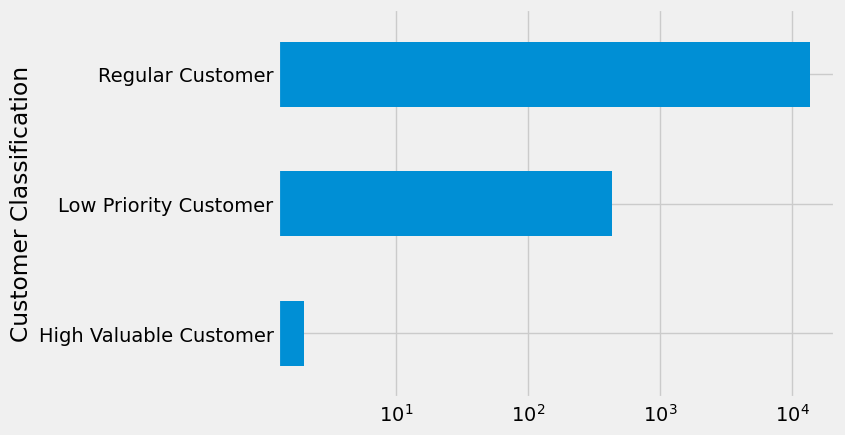

In [72]:
transaction_RFM_df_Classfication = transaction_RFM_df.groupby('Customer Classification')['CustomerID'].count()
transaction_RFM_df_Classfication
plot = transaction_RFM_df_Classfication.plot.barh(y="Count",x="Customer Classification",logx=True)

## EDA

In [73]:
transaction_df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,0917d4201b7ffddc0639d71bbdb0c32bce71ee54cc7176...,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,29
2,T3,19709d72a3c593cea811e5d17749c99f0e0ddc29eb8f36...,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,27
3,T4,358986ad8a41b9bec0199f1b47b21a5ce1e57601ec8b74...,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,50
4,T5,e515f12b37d2ae1f859c9451522a471c7ed2ddfdde2d04...,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,35
6,T7,471b4f5538f32105af4a2920fa9a8c5ab795f062c3a491...,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,31


In [74]:
transaction_df['CustGender'] = transaction_df['CustGender'].replace({'M':'Male', 'F':'Female', 'T':'Male'})

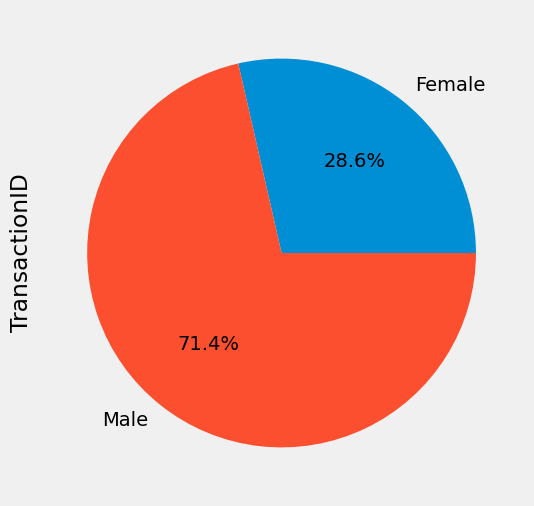

In [75]:
# no. of transactions by gender
data_customers = transaction_df.groupby('CustGender')['TransactionID'].count()
data_customers
plot = data_customers.plot.pie(subplots=False, figsize=(11, 6),autopct='%1.1f%%')

Text(0, 0.5, 'Transaction Amount in INR')

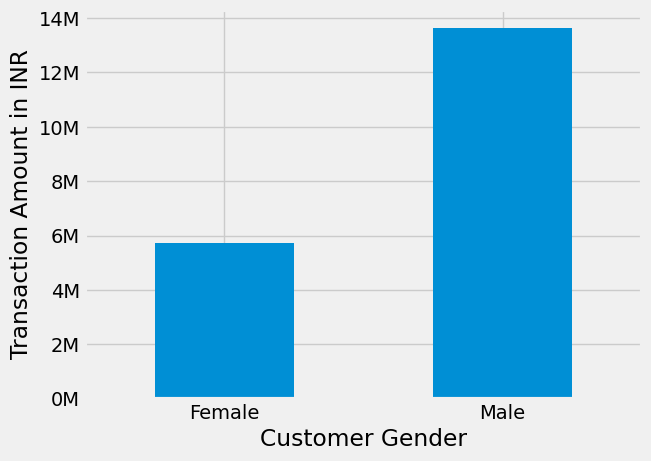

In [76]:
# Tansaction amount by gender
import matplotlib as plt
data_customers_transactionamount_gender= transaction_df.groupby('CustGender')['TransactionAmount (INR)'].sum().astype('int64')
data_customers_transactionamount_gender
plot = data_customers_transactionamount_gender.plot.bar(rot=0)
plot.yaxis.set_major_formatter(plt.ticker.FuncFormatter(lambda x, p: f"{x//10**6:,.0f}M"))
mtp.xlabel("Customer Gender")
mtp.ylabel("Transaction Amount in INR")

Text(0.5, 0, 'No of transactions')

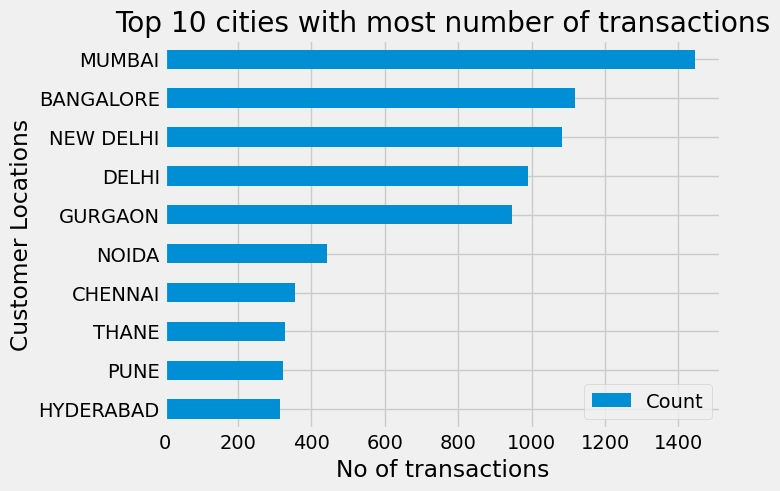

In [77]:
#Select the top 10 cities with most number of transactions.
data_customers_transactionamount_custlocation =transaction_df.groupby('CustLocation')['TransactionID'].count().reset_index(name='Count').sort_values(['Count'],ascending=False).head(10)
data_customers_transactionamount_custlocation= data_customers_transactionamount_custlocation.sort_values("Count")
data_customers_transactionamount_custlocation
plot = data_customers_transactionamount_custlocation.plot.barh(y="Count",x="CustLocation")
mtp.title("Top 10 cities with most number of transactions")
mtp.ylabel("Customer Locations")
mtp.xlabel("No of transactions")

Text(0, 0.5, 'Customer Age Range')

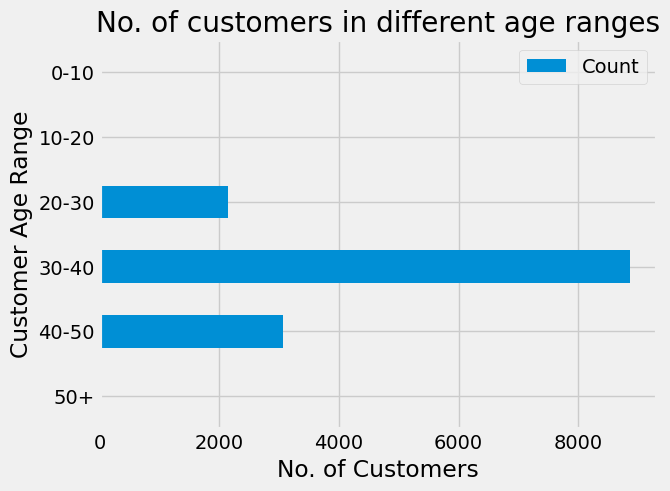

In [78]:
# no. of customers by age
data_customers_age = transaction_df.groupby('Age')['CustomerID'].count().reset_index(name='Count').sort_values(['Age'],ascending=False)
data_customers_age

Age_bins = [0,10,20,30,40,50,60]
labels = ['0-10','10-20','20-30','30-40','40-50','50+']
data_customers_age['Age_Range'] = pd.cut(data_customers_age['Age'], bins=Age_bins, labels=labels, include_lowest=True)
data_customers_age

data_customers_age_range = data_customers_age.groupby('Age_Range')['Count'].sum().reset_index(name='Count').sort_values(['Age_Range'],ascending=False)
data_customers_age_range

plot = data_customers_age_range.plot.barh(y="Count",x="Age_Range")
mtp.title("No. of customers in different age ranges")
mtp.xlabel("No. of Customers")
mtp.ylabel("Customer Age Range")

### Kmeans Clustering ###

In [79]:
transaction_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,0917d4201b7ffddc0639d71bbdb0c32bce71ee54cc7176...,1994-10-01,Female,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,29
2,T3,19709d72a3c593cea811e5d17749c99f0e0ddc29eb8f36...,1996-11-26,Female,MUMBAI,17874.44,2016-02-08,142712,459.0,27
3,T4,358986ad8a41b9bec0199f1b47b21a5ce1e57601ec8b74...,1973-09-14,Female,MUMBAI,866503.21,2016-02-08,142714,2060.0,50
4,T5,e515f12b37d2ae1f859c9451522a471c7ed2ddfdde2d04...,1988-03-24,Female,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,35
6,T7,471b4f5538f32105af4a2920fa9a8c5ab795f062c3a491...,1992-01-26,Female,MUMBAI,973.46,2016-02-08,173806,566.0,31
...,...,...,...,...,...,...,...,...,...,...
16475,T16476,39693ebc32792d1cb24582783668fdd648f987d19400fb...,1984-03-30,Male,ASANSOL,31676.11,2016-09-26,204024,180.0,39
16476,T16477,05328d4e54fcad00020f01e48ec8b007772b285d1c9a38...,1990-08-19,Female,VISAKHAPATNAM,18001.73,2016-09-26,205310,120.0,33
16477,T16478,fba7e9fa89c09b3d0438adb2f65459c784b8e4e62ab4a0...,1990-10-08,Male,OFF HAL AIRPORT BANGALORE,13517.67,2016-09-26,203726,200.0,33
16478,T16479,5e1bf8453365a2004dcab55a1dcd1d000bcc9517ac6151...,1979-10-01,Male,NAVI MUMBAI,63659.35,2016-09-26,203827,880.0,44


In [80]:
uniqueValues = transaction_df['CustomerID'].nunique()
print(uniqueValues)

14051


In [81]:
Spending_df=transaction_df[['CustomerID','TransactionAmount (INR)','Age','CustLocation','CustGender']]
Spending_df


Spending_df = Spending_df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index(name='Spending Amount').sort_values(['Spending Amount'],ascending=False)
Spending_df
max_Spending=Spending_df['Spending Amount'].max()
Spending_bins = [0,5000,10000,20000,30000,40000,50000,100000,200000,400000,max_Spending]
labels = [10,20,30,40,50,60,70,80,90,100]
Spending_df['Spending_Score'] = pd.cut(Spending_df['Spending Amount'], bins=Spending_bins, labels=labels, include_lowest=True)
Spending_df

,CustomerID,Spending Amount,Spending_Score
8582,9bcf3dcd1c76ef335cf9548397ea1f3a75c8beae909c67...,455122.0,100
2280,285086581c5007e14018bb6660cd153550531dcb70bb2c...,300000.0,90
10850,c4d8da21de9f0b2a7afd6f9149957d99ff2fc34a9453f7...,100000.0,70
13939,fdd8f1c17b18dcb9421891c2888b60bca3153c501845da...,100000.0,70
12675,e6453662a5279e2c4b13a07eaa73e4c1179d77f7249d21...,100000.0,70
...,...,...,...
8386,98625120a3873e12f41e12eb995ada54e3d1c97c8abc35...,0.0,10
6970,7f31d047bc12ecc34d2a6f7c8db7fd98fd27a1e3cd80fb...,0.0,10
12138,dc417a5b5991c7682799e10863a6203b54e07847633e45...,0.0,10
361,05f74aea11933f306529836118d1b63f046a350bceb77e...,0.0,10


In [82]:
Spending_age_df=Spending_df.join(transaction_df, lsuffix="_left", rsuffix="_right", how='left')

Spending_age_df=Spending_age_df[['CustomerID_left','Spending Amount','Spending_Score','Age','TransactionDate','CustLocation','CustAccountBalance']]

Spending_age_df = Spending_age_df.rename(columns={'CustomerID_left': 'CustomerID'})

Spending_age_df=Spending_age_df.dropna()
Spending_age_df


,CustomerID,Spending Amount,Spending_Score,Age,TransactionDate,CustLocation,CustAccountBalance
8582,9bcf3dcd1c76ef335cf9548397ea1f3a75c8beae909c67...,455122.0,100,31.0,2016-09-26,HYDERABAD,50.10
2280,285086581c5007e14018bb6660cd153550531dcb70bb2c...,300000.0,90,33.0,2016-10-21,PUNE,5301.42
10850,c4d8da21de9f0b2a7afd6f9149957d99ff2fc34a9453f7...,100000.0,70,34.0,2016-09-26,GUWAHATI,49.38
13939,fdd8f1c17b18dcb9421891c2888b60bca3153c501845da...,100000.0,70,30.0,2016-09-26,BHUJ,6388.28
12675,e6453662a5279e2c4b13a07eaa73e4c1179d77f7249d21...,100000.0,70,34.0,2016-09-22,MUMBAI,29054.51
...,...,...,...,...,...,...,...
10113,b721b96e00c0d36a280aa4e9f085259ec647f9bd6de152...,0.0,10,43.0,2016-09-25,MUMBAI,66975.93
8386,98625120a3873e12f41e12eb995ada54e3d1c97c8abc35...,0.0,10,36.0,2016-09-26,KOLKATA,76989.87
12138,dc417a5b5991c7682799e10863a6203b54e07847633e45...,0.0,10,40.0,2016-09-26,ZIRAKPUR,13929.10
361,05f74aea11933f306529836118d1b63f046a350bceb77e...,0.0,10,44.0,2016-10-21,DEWAS,27961.15


In [83]:
x = Spending_age_df.iloc[:, [3, 2]].values
x=x.round(decimals=0, out=None)
x

array([[ 31., 100.],
       [ 33.,  90.],
       [ 34.,  70.],
       ...,
       [ 40.,  10.],
       [ 44.,  10.],
       [ 35.,  10.]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

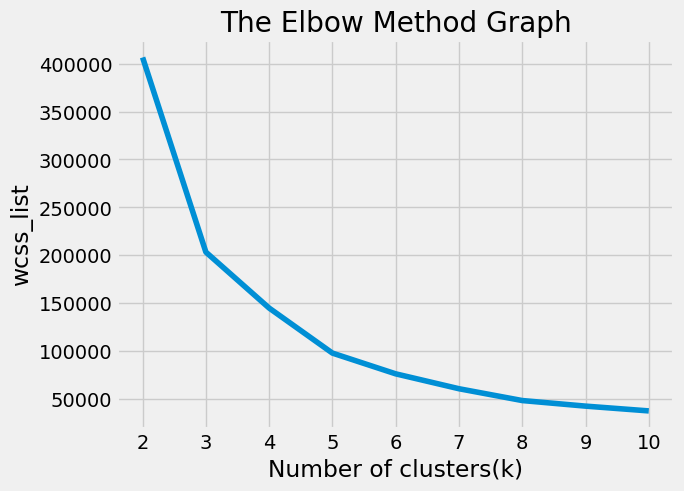

In [84]:
#finding optimal number of clusters using the elbow method
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(2, 11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

In [85]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [86]:
y_predict

array([2, 2, 2, ..., 3, 1, 3], dtype=int32)

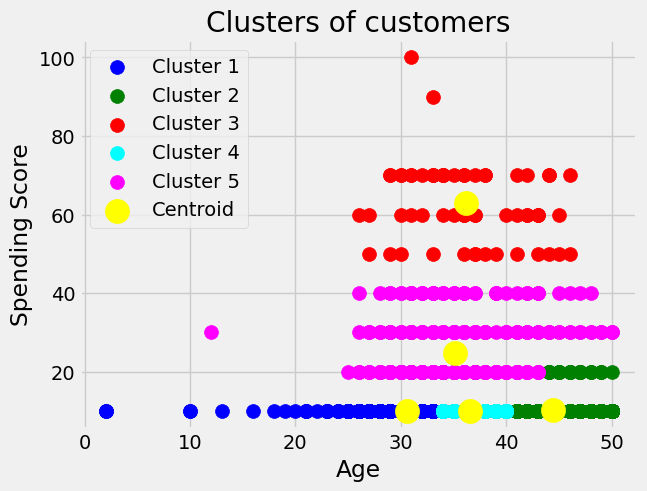

In [87]:
import matplotlib.ticker as ticker
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of customers')
mtp.xlabel('Age')
mtp.ylabel('Spending Score')
mtp.legend()
mtp.show()

From the above plot, Below are the findings:
1. Cluster 1 - Group of Middle aged Customers with low Spending Score
2. Cluster 2 - Group of Middle aged Customers with High Spending Score
3. Cluster 3 - Group of Old aged Customers with low Spending Score
4. Cluster 4 - Group of Middle aged Customers with Mid Spending Score
5. Cluster 5 - Group of Young aged Customers with low Spending Score

From this we can conclude that Cluster 2 customers are the targeted customers as they are middle aged and have a high spending score.



### KMeans with PCA ###

In [88]:
# data scaling
from sklearn. preprocessing import StandardScaler
Spending_age_new_df=Spending_age_df.copy()
Spending_age_new_df.drop(columns=['CustomerID','CustLocation','TransactionDate'],inplace=True)

df_scaled=StandardScaler().fit_transform(Spending_age_new_df)
df_scaled=pd.DataFrame(df_scaled,columns=Spending_age_new_df.columns)
df_scaled.head()

,Spending Amount,Spending_Score,Age,CustAccountBalance
0,66.789205,18.283795,-0.903271,-0.209221
1,43.954723,16.233731,-0.543850,-0.196670
2,14.514048,12.133604,-0.364140,-0.209223
3,14.514048,12.133604,-1.082982,-0.194073
4,14.514048,12.133604,-0.364140,-0.139900


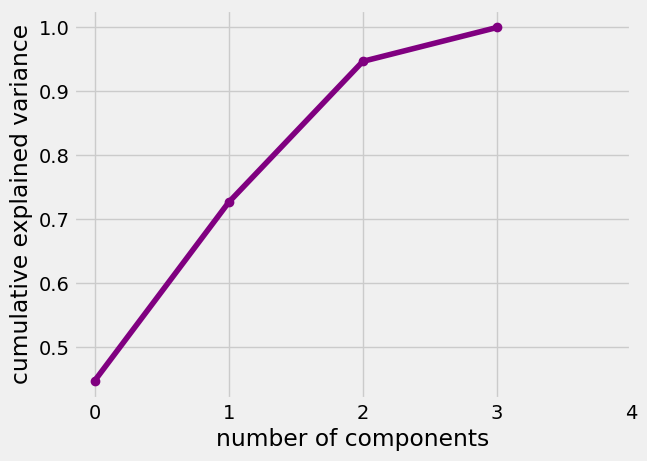

In [89]:
# here we want to check how many component we need to explain 90%  of the variance
from sklearn.decomposition import PCA
# %matplotlib inline
mtp.style.use("fivethirtyeight")
pca = PCA().fit(df_scaled.iloc[:,:])
mtp.plot(np.cumsum(pca.explained_variance_ratio_),color='purple',marker='o')
mtp.xlabel('number of components')
mtp.ylabel('cumulative explained variance')
mtp.xticks(np.arange(0, 5, 1))
mtp.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

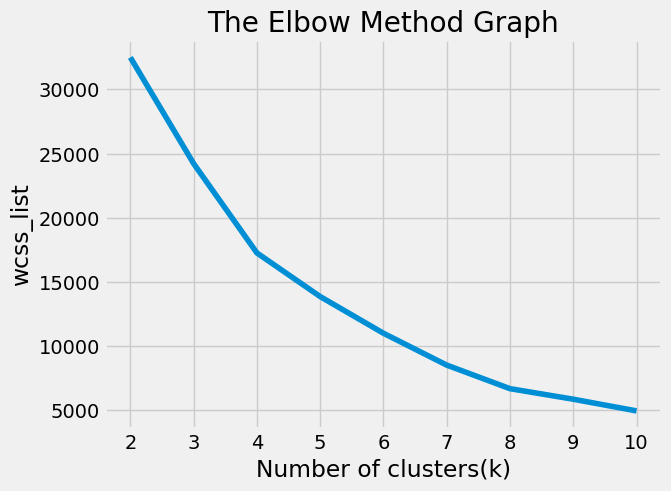

In [90]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_scaled.iloc[:,:])
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 2 to 11.
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(pca_data)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(2,11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

In [91]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict_pca= kmeans_pca.fit_predict(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [92]:
PCA_kmeans = KMeans(n_clusters=4 ,  init='k-means++', random_state= 42)
PCA_kmeans.fit(pca_data)
# create a dataframe for the pca data
pca_df = pd.DataFrame(pca_data, columns=['PC1','PC2','PC3'])
pca_df['label'] = PCA_kmeans.labels_
pca_df.head(150)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PC1,PC2,PC3,label
0,60.160958,0.043053,0.798354,0
1,42.562820,0.086932,0.436232,0
2,18.846718,-0.099789,0.153634,0
3,18.854065,-0.597402,0.672537,0
4,18.845812,-0.050787,0.202662,0
...,...,...,...,...
145,4.325777,-0.947232,0.760760,1
146,4.296627,0.345109,-0.488123,2
147,4.238097,3.496563,1.648236,2
148,4.304328,-0.446950,0.244585,1


In [93]:
pca_df.label.unique()

array([0, 1, 2, 3], dtype=int32)

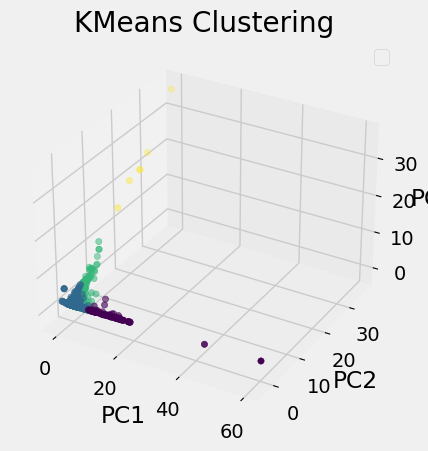

In [94]:
ax = mtp.axes(projection='3d')
ax.scatter3D('PC1','PC2', 'PC3', c = 'label', data = pca_df, cmap='viridis',  linewidth=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
mtp.title('KMeans Clustering')
mtp.legend()
mtp.show()